In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=717af7932149f9d2fc246583794ee41934fe41993a22e8ab3c3a07ab2d9ccc57
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 5,330 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr

In [3]:
# import cv2
# import pytesseract


# image = cv2.imread('ktp2.png', 0)
# thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# data = pytesseract.image_to_string(thresh)
# print(data)
# import matplotlib.pyplot as plt
# plt.imshow(thresh)

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


In [17]:
from difflib import SequenceMatcher
data = []
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

### NIK

(200, 1370)
nik2


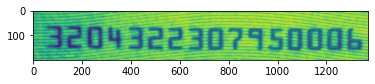

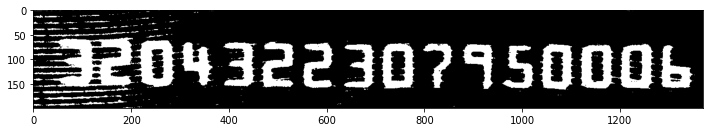

In [18]:
image = cv2.imread("dimaz_2.jpeg", 0)
nik2 = image[600:800 ,860:2230]
print(nik2.shape)
th1, threshed1 = cv2.threshold(nik2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print('nik2')
plt.imshow(nik2)
display(threshed1)

In [19]:
result2 = pytesseract.image_to_string(nik2, lang="ind")
print(result2)

32043223079150006



In [20]:
print(str(result2))
result = []
for i in result2:
  if i=='\n' or i=='\x0c':
    pass
  else:
    result.append(i)
result = "".join(result)
result = result.replace(" ", "")

32043223079150006



In [21]:
print(similar(result, '3204322307950006'))
if similar(result, '3204322307950006') >= 0.90:
  data.append(result)

0.9696969696969697


### Nama

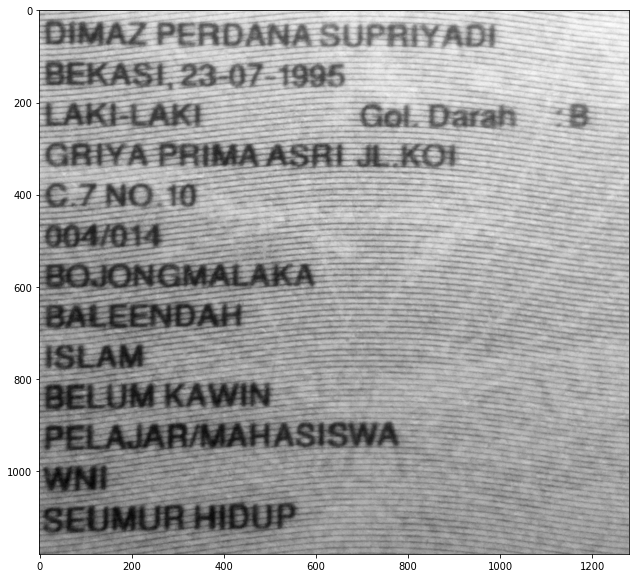

In [22]:
nama = image[820:2000, 970:2250]
display(nama)

nama


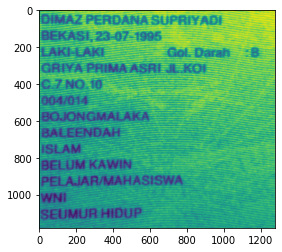

In [23]:
# nama = cv2.cvtColor(nama, cv2.COLOR_BGR2RGB)


print('nama')
plt.imshow(nama)

In [24]:
result = pytesseract.image_to_string(nama, lang="ind")
print(result)

DIMAZ PERDANA SUPRIYADI

 



In [25]:
print(result.split("\n"))

['DIMAZ PERDANA SUPRIYADI', '', ' ', '\x0c']


In [26]:
result = result.split("\n")
nama = result[0]

In [27]:
print(similar(nama, 'DIMAZ PERDANA SUPRIYADI'))
if similar(nama, 'DIMAZ PERDANA SUPRIYADI') >= 0.90:
  data.append(nama)

1.0


tempat tanggal lahir

(1080, 1280, 3)
BEKASI 23-07-1995
LAKI-LAKI Got Darar
GRHYA PRIMA ASRI jt KOI
Z1 NO 10

9504/0614

BOJONGM.

   

 



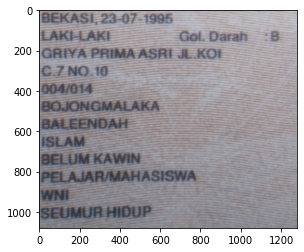

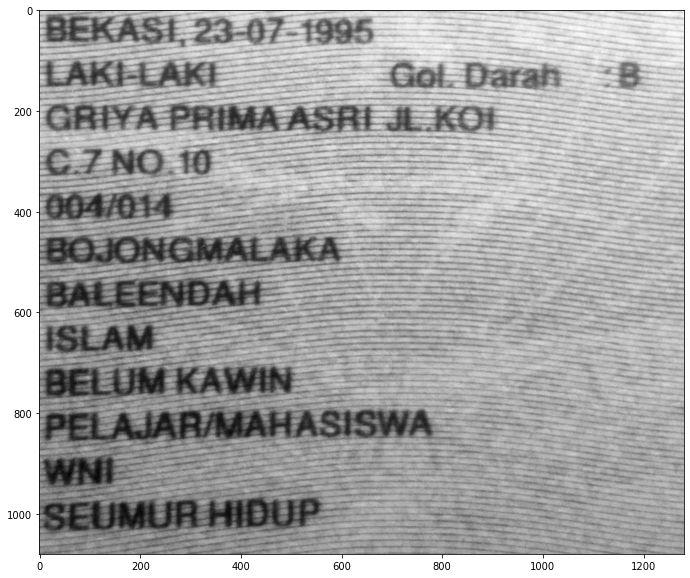

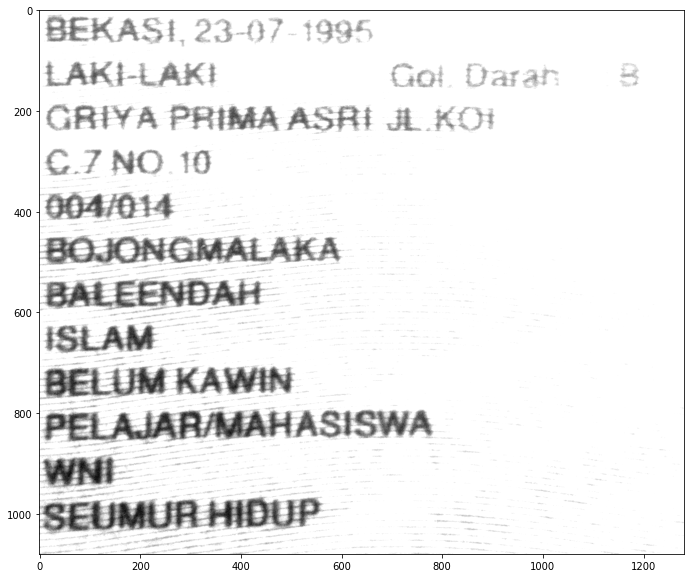

In [28]:
img = cv2.imread("dimaz_2.jpeg")[920:2000, 970:2250]
print(img.shape)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
display(threshed)
result = pytesseract.image_to_string(threshed, lang="ind")
print(result)

In [29]:
lahiran = result.split('\n')
lahiran

['BEKASI 23-07-1995',
 'LAKI-LAKI Got Darar',
 'GRHYA PRIMA ASRI jt KOI',
 'Z1 NO 10',
 '',
 '9504/0614',
 '',
 'BOJONGM.',
 '',
 '   ',
 '',
 ' ',
 '\x0c']

In [30]:
lahiran = lahiran[0]
print(similar(lahiran, 'BEKASI, 23-07-1995'))
if similar(lahiran, 'BEKASI, 23-07-1995') >= 0.90:
  data.append(lahiran)

0.9714285714285714


### Hasil Ekstraksi

In [31]:
data

['32043223079150006', 'DIMAZ PERDANA SUPRIYADI', 'BEKASI 23-07-1995']